In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [46]:
alpha = plt.imread('alpha.jpg')

In [103]:
def image_plotting(img,ind,title):
    plt.subplot(5,3,ind)
    plt.imshow(img,cmap='gray')
    plt.title(title,fontsize=30)
    plt.savefig('assignment_8.jpg')

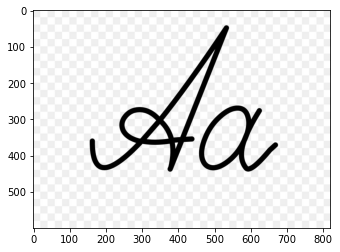

In [89]:
plt.imshow(alpha)

In [90]:
alpha_gray = cv2.cvtColor(alpha,cv2.COLOR_RGB2GRAY)
_,image = cv2.threshold(alpha_gray, 127, 255, cv2.THRESH_BINARY)
image = image ^ 255 # needs to make alphabet 1 and background 0

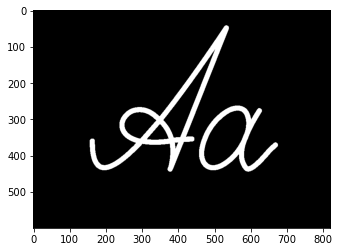

In [91]:
plt.imshow(image,cmap='gray')

In [92]:
kernel1 = np.ones((3,3),np.uint8)
kernel2 = np.array([[0.0,1,0],[1,1,1],[0,1,0]],np.uint8)
kernel3 = np.array([[1.0,1,1],[1,0,1],[1,1,1]],np.uint8)

kernel3

array([[1, 1, 1],
       [1, 0, 1],
       [1, 1, 1]], dtype=uint8)

# Dilation & Erosion

In [108]:
erosions = []
dialations = []
opening = []
closing = []
for kernel in [kernel1,kernel2,kernel3]:
#     print(kernel)
    erosions.append(cv2.erode(image, kernel))
    dialations.append(cv2.dilate(image, kernel))
#     opening
    opening.append(cv2.dilate(cv2.erode(image,kernel),kernel))
#     closing
    closing.append(cv2.erode(cv2.dilate(image,kernel),kernel))
    

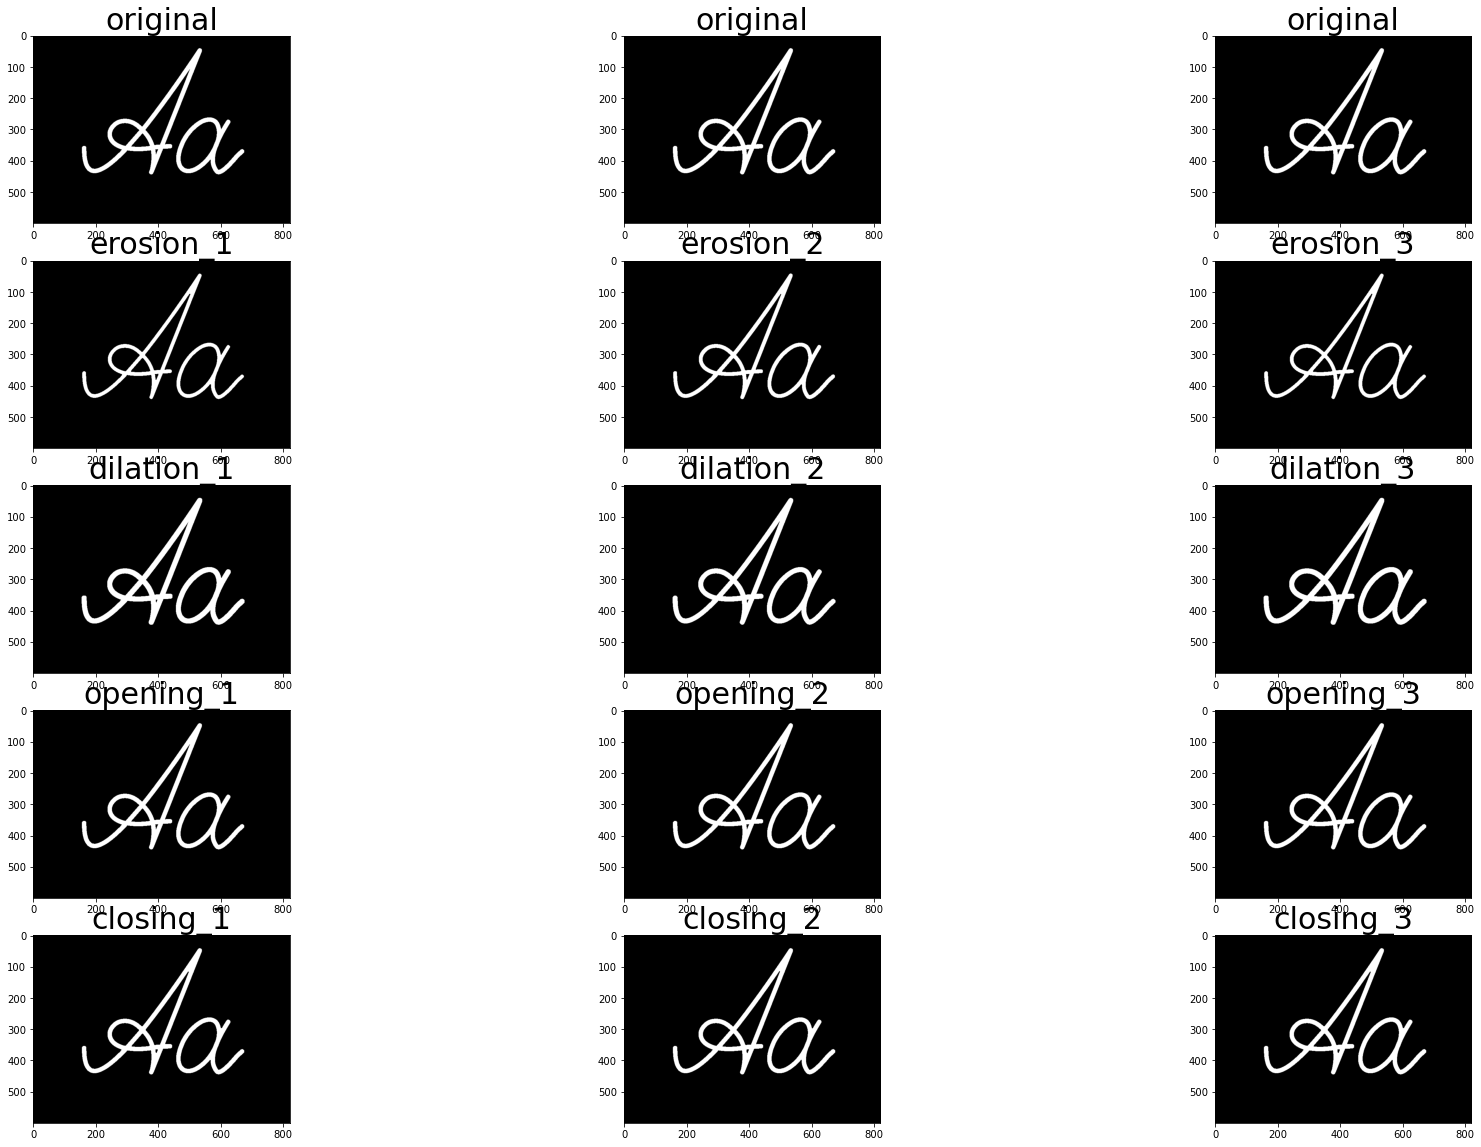

In [110]:
plt.figure(figsize=(30,20))
for i in range(3):
    image_plotting(image,i+1,'original')
    image_plotting(erosions[i],i+4,'erosion_'+str(i+1))
    image_plotting(dialations[i],i+7,'dilation_'+str(i+1))
    image_plotting(opening[i],i+3*3+1,'opening_'+str(i+1))
    image_plotting(closing[i],i+3*4+1,'closing_'+str(i+1))
    